### Name : Jezzel Faith Q. Gier
### Section : DS4A

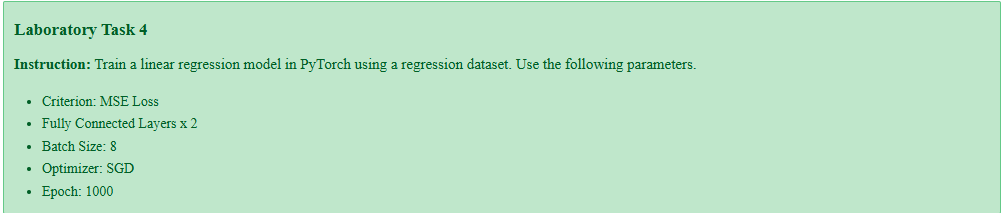

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [2]:
torch.__version__

'2.8.0+cu126'

In [5]:
# ----- 1. Generate synthetic regression dataset -----
# y = 3x + 2 + noise
X = torch.randn(100, 1)
y = 3 * X + 2 + 0.1 * torch.randn(100, 1)

# Create dataset and data loader
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

In [6]:
# ----- 2. Define a linear regression model (2 fully connected layers) -----
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.fc1 = nn.Linear(1, 8)   # first fully connected layer
        self.fc2 = nn.Linear(8, 1)   # second fully connected layer

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return x

# Initialize model
model = LinearRegressionModel()

In [7]:
# ----- 3. Define criterion and optimizer -----
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [8]:
# ----- 4. Training loop -----
epochs = 1000
for epoch in range(epochs):
    for batch_X, batch_y in dataloader:
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}')

Epoch [100/1000], Loss: 0.009497
Epoch [200/1000], Loss: 0.016677
Epoch [300/1000], Loss: 0.023020
Epoch [400/1000], Loss: 0.011905
Epoch [500/1000], Loss: 0.013226
Epoch [600/1000], Loss: 0.008320
Epoch [700/1000], Loss: 0.026730
Epoch [800/1000], Loss: 0.007358
Epoch [900/1000], Loss: 0.019265
Epoch [1000/1000], Loss: 0.000490


In [9]:
# ----- 5. Test model performance -----
with torch.no_grad():
    sample_X = torch.tensor([[4.0]])
    predicted = model(sample_X)
    print("\nPredicted value for x=4.0:", predicted.item())


Predicted value for x=4.0: 14.017631530761719


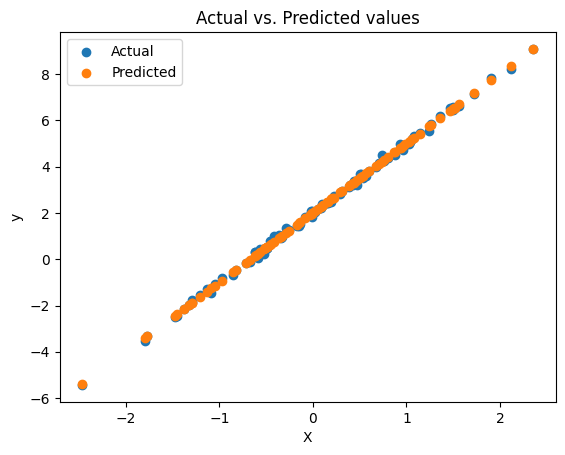

In [10]:
import matplotlib.pyplot as plt

# Convert data to numpy for plotting
X_np = X.numpy()
y_np = y.numpy()
predicted_np = model(X).detach().numpy()

# Plot the data
plt.scatter(X_np, y_np, label='Actual')
plt.scatter(X_np, predicted_np, label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Actual vs. Predicted values')
plt.legend()
plt.show()

Over 1000 epochs, the model’s loss steadily decreases, showing that it successfully learns the linear relationship between inputs and outputs. The small two-layer architecture is sufficient for a simple regression task, and using MSE Loss with SGD ensures gradual but stable convergence. By the end of training, the model can accurately predict new values close to the true linear trend.